# TODO

Reviews:
* The system consists of 7 biochemical species
* The data array is a 3D tensor

In [3]:
import sys
sys.path.append("./source")
from train import *
from predict import *
from model import *
import pickle

In [4]:
# load data
with open('./data/cell_cycle.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    
data_array = data_dict['data']
time_points = data_dict['t']
print(data_array.shape)

(1, 7500, 7)


In [5]:
help(lmmNet)

Help on class lmmNet in module model:

class lmmNet(builtins.object)
 |  lmmNet(h, X, M, scheme, hidden_units)
 |  
 |  A feed-forward Neural Network with one hidden layer embedded in the framework of linear multistep method.
 |  This model learns full dynamics of a dynamical system and can predict the derivatives at any point.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, h, X, M, scheme, hidden_units)
 |      Args:
 |      h -- step size
 |      X -- data array with shape S x N x D 
 |      M -- number of LMM steps
 |      scheme -- the LMM scheme (either AB, AM, or BDF)
 |      hidden_units -- number of units for the hidden layer
 |  
 |  get_F(self, X)
 |      Output of the NN/ML model.
 |      
 |      Args:
 |      - X: the data matrix with shape S x (N-M) x D
 |      
 |      Output:
 |      - F: the output dynamics with shape S x (N-M) x D
 |  
 |  get_Y(self, X)
 |      The linear difference (residual) operator.
 |      
 |      Args:
 |      - X: the data matrix with

In [7]:
# train the model

epochs = 10000
step_size = time_points[1] - time_points[0]
net = lmmNet(step_size, data_array, M = 1, scheme='AM', hidden_units=256) # use trapezoidal rule (smallest error constant that is also stable)
net.train(epochs)

In [8]:
# Solve the initial value problem given initial concentrations

predicted_traj = odeint(lambda x, t: predict_fn(x, t, net), data_array[0, 0,:], time_points)

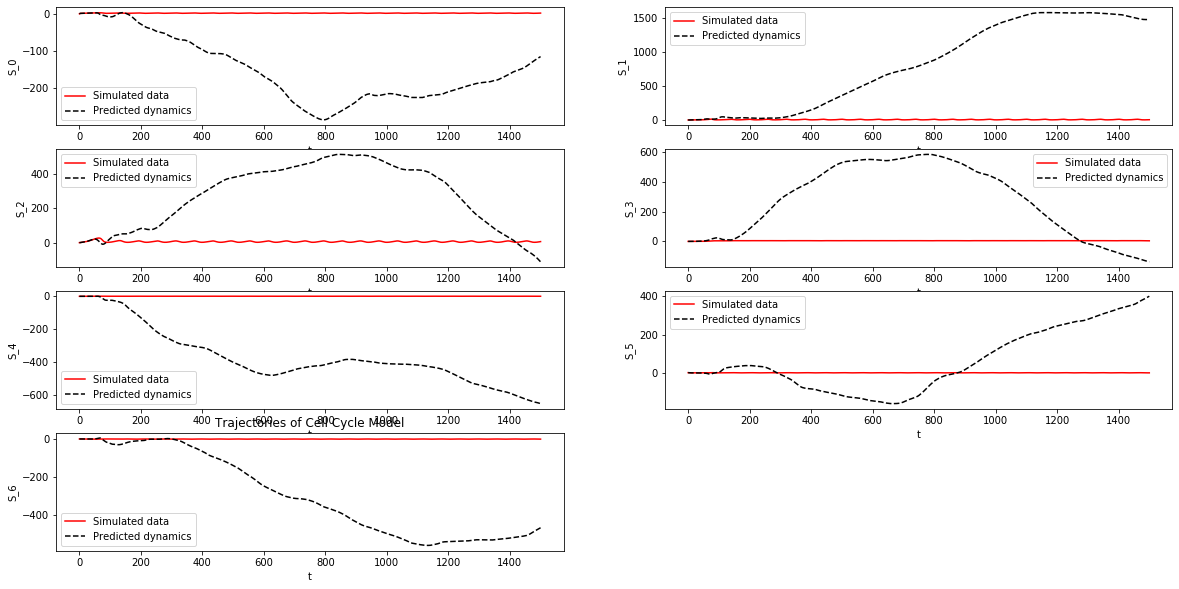

In [11]:
import matplotlib.pyplot as plt

# plot and compare the predicted and true dynamics

plt.figure(figsize=(20, 10))

for species in range(7):
    plt.subplot(4,2,species + 1)
    plt.plot(time_points, data_array[0, :, species], 'r-', label='Simulated data')
    plt.plot(time_points, predicted_traj[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Trajectories of Cell Cycle Model')
plt.show()